In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\who_suicide_statistics.csv")


In [3]:
print(df)

        country  year     sex          age  suicides_no  population
0       Albania  1985  female  15-24 years          NaN    277900.0
1       Albania  1985  female  25-34 years          NaN    246800.0
2       Albania  1985  female  35-54 years          NaN    267500.0
3       Albania  1985  female   5-14 years          NaN    298300.0
4       Albania  1985  female  55-74 years          NaN    138700.0
...         ...   ...     ...          ...          ...         ...
43771  Zimbabwe  1990    male  25-34 years        150.0         NaN
43772  Zimbabwe  1990    male  35-54 years        132.0         NaN
43773  Zimbabwe  1990    male   5-14 years          6.0         NaN
43774  Zimbabwe  1990    male  55-74 years         74.0         NaN
43775  Zimbabwe  1990    male    75+ years         13.0         NaN

[43776 rows x 6 columns]


In [4]:
# The total number of countries' data available for suicidal analysis

print("No. of Countries available for analysis :", df['country'].nunique())

No. of Countries available for analysis : 141


In [5]:
# checking the missing values in the dataset

print(df.isnull().sum())

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64


In [6]:
df['suicides_no']=df['suicides_no'].fillna(0)
df['population']=df['population'].fillna(df['population'].mean())
df=df[df['year']<2016]
print(df)

        country  year     sex          age  suicides_no    population
0       Albania  1985  female  15-24 years          0.0  2.779000e+05
1       Albania  1985  female  25-34 years          0.0  2.468000e+05
2       Albania  1985  female  35-54 years          0.0  2.675000e+05
3       Albania  1985  female   5-14 years          0.0  2.983000e+05
4       Albania  1985  female  55-74 years          0.0  1.387000e+05
...         ...   ...     ...          ...          ...           ...
43771  Zimbabwe  1990    male  25-34 years        150.0  1.664091e+06
43772  Zimbabwe  1990    male  35-54 years        132.0  1.664091e+06
43773  Zimbabwe  1990    male   5-14 years          6.0  1.664091e+06
43774  Zimbabwe  1990    male  55-74 years         74.0  1.664091e+06
43775  Zimbabwe  1990    male    75+ years         13.0  1.664091e+06

[43476 rows x 6 columns]


In [7]:
print(df.isnull().sum())

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64


        country  year     sex          age  suicides_no    population
0       Albania  1985  female  15-24 years          0.0  2.779000e+05
1       Albania  1985  female  25-34 years          0.0  2.468000e+05
2       Albania  1985  female  35-54 years          0.0  2.675000e+05
3       Albania  1985  female   5-14 years          0.0  2.983000e+05
4       Albania  1985  female  55-74 years          0.0  1.387000e+05
...         ...   ...     ...          ...          ...           ...
43771  Zimbabwe  1990    male  25-34 years        150.0  1.664091e+06
43772  Zimbabwe  1990    male  35-54 years        132.0  1.664091e+06
43773  Zimbabwe  1990    male   5-14 years          6.0  1.664091e+06
43774  Zimbabwe  1990    male  55-74 years         74.0  1.664091e+06
43775  Zimbabwe  1990    male    75+ years         13.0  1.664091e+06

[43476 rows x 6 columns]


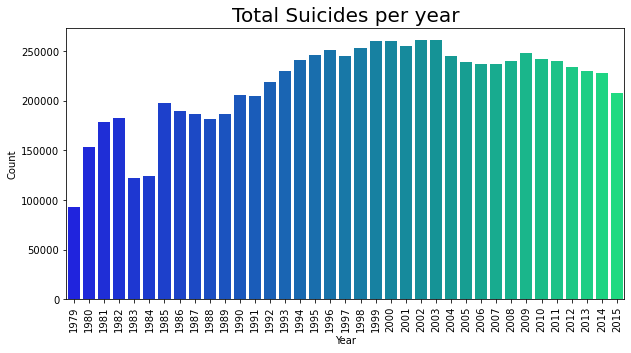

In [9]:
print(df)
total_suicides=df[['year','suicides_no']].groupby(['year'],as_index=False).sum()
sns.barplot(x='year', y = 'suicides_no', data = total_suicides, palette = 'winter')
plt.title('Total Suicides per year', fontsize = 20)
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10,5)
plt.ylabel('Count')
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World\World_total_suicides_per_year.png",format='png')
plt.show()

In [11]:
#Top 10 countries in suicides

top_countries=df[['country','suicides_no']].groupby(['country'],as_index=False).sum().sort_values(by = 'suicides_no',
    ascending = False).head(10)
print(top_countries)

                      country  suicides_no
104        Russian Federation    1500992.0
135  United States of America    1201401.0
62                      Japan     937614.0
42                     France     395500.0
132                   Ukraine     365170.0
45                    Germany     291262.0
99          Republic of Korea     261730.0
18                     Brazil     250824.0
95                     Poland     172562.0
134            United Kingdom     166314.0


In [12]:
top_countries.style.background_gradient(cmap = 'Blues')

,country,suicides_no
104,Russian Federation,1500992.000000
135,United States of America,1201401.000000
62,Japan,937614.000000
42,France,395500.000000
132,Ukraine,365170.000000
45,Germany,291262.000000
99,Republic of Korea,261730.000000
18,Brazil,250824.000000
95,Poland,172562.000000
134,United Kingdom,166314.000000


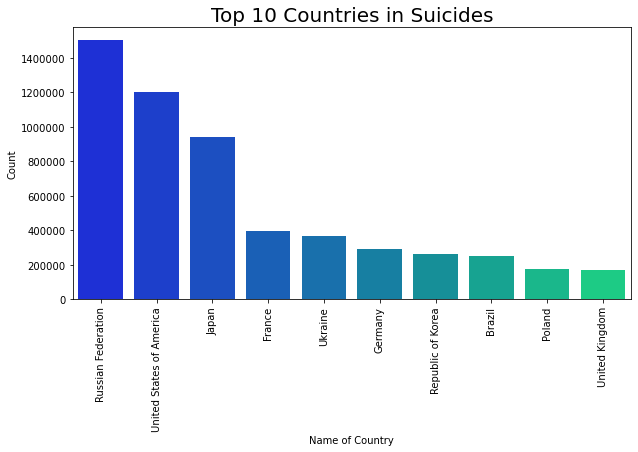

In [13]:
sns.barplot(x='country', y = 'suicides_no', data = top_countries, palette = 'winter')
plt.title('Top 10 Countries in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(10,5)
plt.ylabel('Count')
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World\World_top10countries_in_suicides.png",format='png')
plt.show()

In [14]:
#Least 10 countries in suicides

least_countries=df[['country','suicides_no']].groupby(['country'],as_index=False).sum().sort_values(by = 'suicides_no',
    ascending = True).head(10)
print(least_countries)

                         country  suicides_no
80                      Mongolia          0.0
39   Falkland Islands (Malvinas)          1.0
82                    Montserrat          1.0
1                       Anguilla          2.0
57                          Iraq          3.0
110        Sao Tome and Principe          4.0
107    Saint Pierre and Miquelon          5.0
131     Turks and Caicos Islands          6.0
77                       Mayotte          6.0
19        British Virgin Islands          8.0


In [15]:
least_countries.style.background_gradient(cmap = 'Blues')

,country,suicides_no
80,Mongolia,0.000000
39,Falkland Islands (Malvinas),1.000000
82,Montserrat,1.000000
1,Anguilla,2.000000
57,Iraq,3.000000
110,Sao Tome and Principe,4.000000
107,Saint Pierre and Miquelon,5.000000
131,Turks and Caicos Islands,6.000000
77,Mayotte,6.000000
19,British Virgin Islands,8.000000


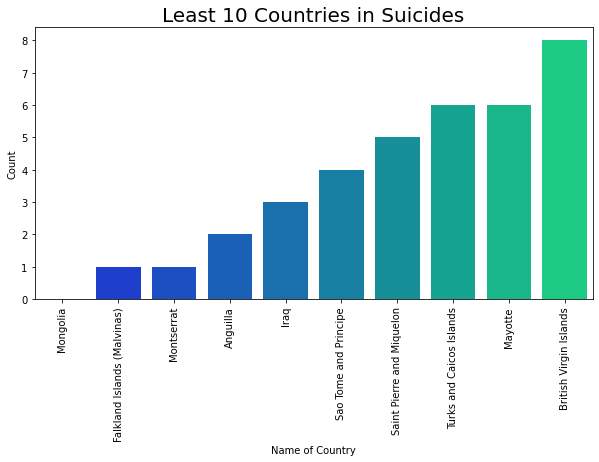

In [16]:
sns.barplot(x='country', y = 'suicides_no', data = least_countries, palette = 'winter')
plt.title('Least 10 Countries in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(10,5)
plt.ylabel('Count')
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World\World_least10countries_in_suicides.png",format='png')
plt.ylabel('Count')
plt.show()

In [17]:
#Suicides number based on gender

suicide_based_on_gender=df[['sex','suicides_no']].groupby(['sex'],as_index=False).sum()
print(suicide_based_on_gender)

      sex  suicides_no
0  female    1898564.0
1    male    6111408.0


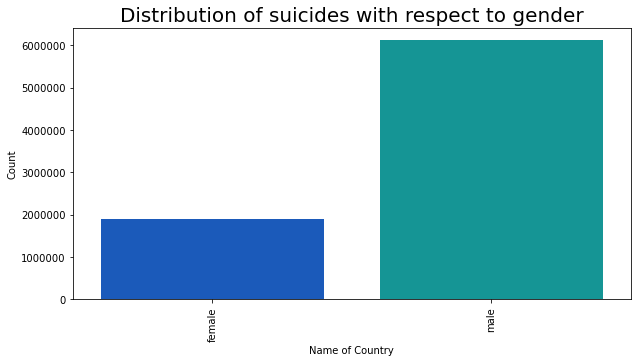

In [18]:
sns.barplot(x='sex', y = 'suicides_no', data =suicide_based_on_gender, palette = 'winter')
plt.title('Distribution of suicides with respect to gender', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(10,5)
plt.ylabel('Count')
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World\World_gender_suicides.png",format='png')
plt.ylabel('Count')
plt.show()

In [19]:
# Top ten countries in number of male suicides 

top_countries_male_suicides=df[df['sex']=='male'][['country','sex','suicides_no']].groupby(['country'],as_index=False).sum().sort_values(by = 'suicides_no',
    ascending = False).head(10)
top_countries_male_suicides.style.background_gradient(cmap = 'Blues')

,country,suicides_no
104,Russian Federation,1221474.000000
135,United States of America,947792.000000
62,Japan,639281.000000
132,Ukraine,293561.000000
42,France,286881.000000
45,Germany,211555.000000
18,Brazil,194873.000000
99,Republic of Korea,179115.000000
95,Poland,145589.000000
134,United Kingdom,122935.000000


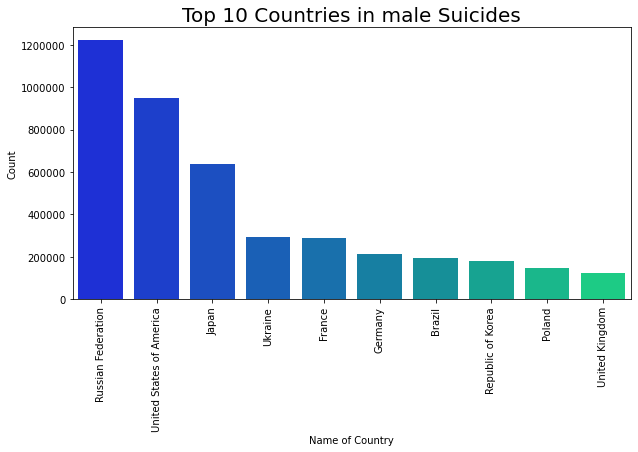

In [20]:
sns.barplot(x='country', y = 'suicides_no', data = top_countries_male_suicides, palette = 'winter')
plt.title('Top 10 Countries in male Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(10,5)
plt.ylabel('Count')
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World\top10_countries_male_suicides.png",format='png')
plt.show()

In [21]:
# Top ten countries in number of female suicides 

top_countries_female_suicides=df[df['sex']=='female'][['country','sex','suicides_no']].groupby(['country'],as_index=False).sum().sort_values(by = 'suicides_no',
    ascending = False).head(10)
top_countries_female_suicides.style.background_gradient(cmap = 'Blues')

,country,suicides_no
62,Japan,298333.000000
104,Russian Federation,279518.000000
135,United States of America,253609.000000
42,France,108619.000000
99,Republic of Korea,82615.000000
45,Germany,79707.000000
132,Ukraine,71609.000000
18,Brazil,55951.000000
134,United Kingdom,43379.000000
60,Italy,40517.000000


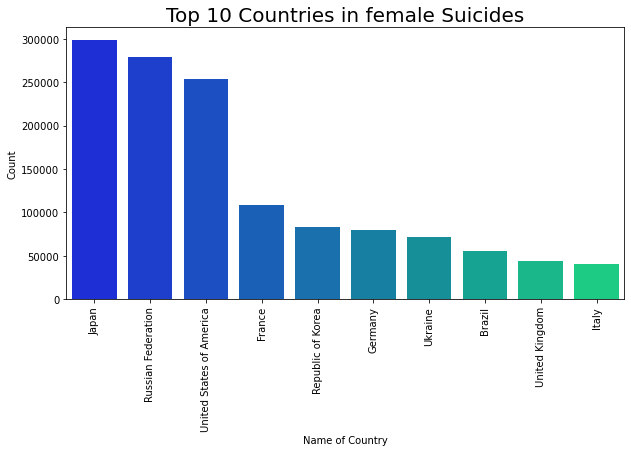

In [22]:
sns.barplot(x='country', y = 'suicides_no', data = top_countries_female_suicides, palette = 'winter')
plt.title('Top 10 Countries in female Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(10,5)
plt.ylabel('Count')
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World\top10_countries_female_suicides.png",format='png')
plt.ylabel('Count')
plt.show()

In [23]:
df.replace('5-14 years', '05-14 years', inplace=True)
suicide_based_on_age=df[['age','suicides_no']].groupby(['age'],as_index=False).sum().sort_values(by = 'age')
suicide_based_on_age.style.background_gradient(cmap = 'Blues')

,age,suicides_no
0,05-14 years,63216.000000
1,15-24 years,982981.000000
2,25-34 years,1365130.000000
3,35-54 years,2889302.000000
4,55-74 years,1953555.000000
5,75+ years,755788.000000


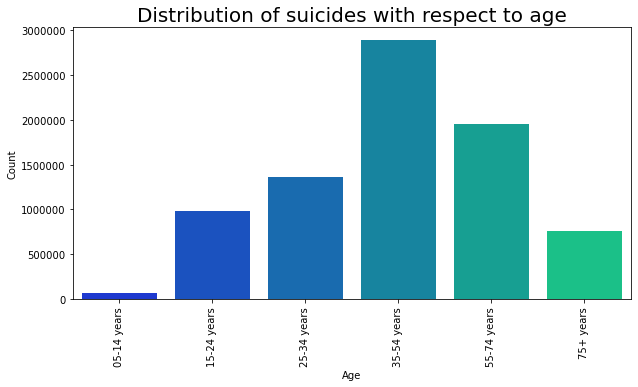

In [24]:
sns.barplot(x='age', y = 'suicides_no', data =suicide_based_on_age, palette = 'winter')
plt.title('Distribution of suicides with respect to age', fontsize = 20)
plt.xlabel('Age')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(10,5)
plt.ylabel('Count')
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World\world_suicides_withrespect_to_age.png",format='png')
plt.ylabel('Count')
plt.show()

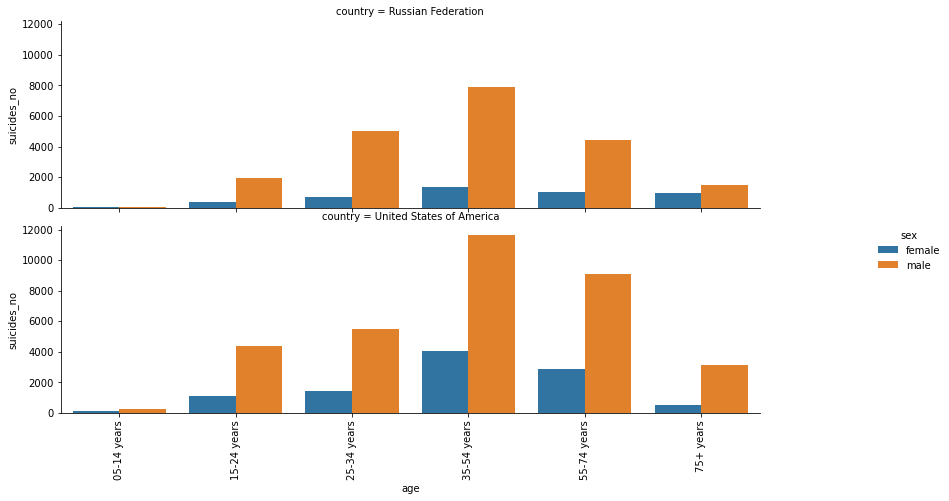

In [26]:
cd = (df.loc[(df['country'].isin(['Russian Federation','United States of America'])) 
             & (df['year'] == 2015), ['country','sex','age','suicides_no']]
      .sort_values(['sex','age']))
sns.catplot(x='age', hue='sex', col='country', y='suicides_no'
            , data=cd, kind='bar', col_wrap=1)
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(15,6)
plt.ylabel('suicides_no')
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World\world_comparisions_usa_russia.png",format='png')

In [27]:
df['crude_rate_per_100k'] = df['suicides_no'] / (df['population'] / 100000)
df

,country,year,sex,age,suicides_no,population,crude_rate_per_100k
0,Albania,1985,female,15-24 years,0.0,2.779000e+05,0.000000
1,Albania,1985,female,25-34 years,0.0,2.468000e+05,0.000000
2,Albania,1985,female,35-54 years,0.0,2.675000e+05,0.000000
3,Albania,1985,female,05-14 years,0.0,2.983000e+05,0.000000
4,Albania,1985,female,55-74 years,0.0,1.387000e+05,0.000000
...,...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,1.664091e+06,9.013929
43772,Zimbabwe,1990,male,35-54 years,132.0,1.664091e+06,7.932258
43773,Zimbabwe,1990,male,05-14 years,6.0,1.664091e+06,0.360557
43774,Zimbabwe,1990,male,55-74 years,74.0,1.664091e+06,4.446872


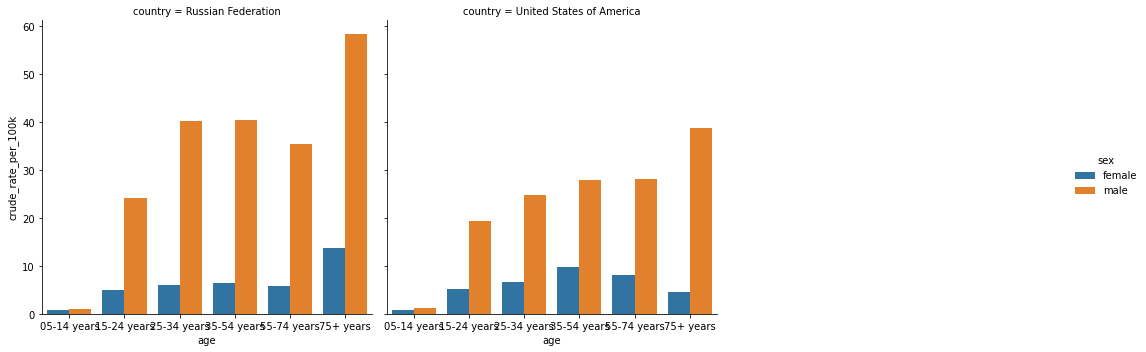

In [89]:
cd = (df.loc[(df['country'].isin(['Russian Federation','United States of America'])) 
             & (df['year'] == 2015), ['country','sex','age','crude_rate_per_100k']]
      .sort_values(['sex','age']))

sns.catplot(x='age', hue='sex', col='country', y='crude_rate_per_100k'
            , data=cd, kind='bar', col_wrap=3)

In [28]:
#Top 10 countries in suicides

top_countries=df[['country','crude_rate_per_100k']].groupby(['country'],as_index=False).median().sort_values(by = 'crude_rate_per_100k',
    ascending = False).head(10)
top_countries.style.background_gradient(cmap = 'Blues')

,country,crude_rate_per_100k
119,Sri Lanka,28.324585
54,Hungary,22.138551
69,Lithuania,21.532582
68,Latvia,20.762600
38,Estonia,20.532618
116,Slovenia,20.111369
104,Russian Federation,18.603422
62,Japan,16.877394
28,Croatia,16.630770
64,Kazakhstan,16.630329


In [29]:
df.loc[(df['year'] >= 1986) & (df['year'] <= 1995), 'decade'] = '1986-1995'
df.loc[(df['year'] >= 1996) & (df['year'] <= 2005), 'decade'] = '1996-2005'
df.loc[(df['year'] >= 2006) & (df['year'] <= 2015), 'decade'] = '2006-2015'
print(df['decade'].unique())

[nan '1986-1995' '1996-2005' '2006-2015']


In [30]:
decade_wise = (df.groupby(['country','decade','sex','age'])['crude_rate_per_100k'].agg(['median','count']).reset_index())

In [31]:
decade_wise

,country,decade,sex,age,median,count
0,Albania,1986-1995,female,05-14 years,0.000000,10
1,Albania,1986-1995,female,15-24 years,2.258562,10
2,Albania,1986-1995,female,25-34 years,1.513933,10
3,Albania,1986-1995,female,35-54 years,1.012489,10
4,Albania,1986-1995,female,55-74 years,0.589583,10
...,...,...,...,...,...,...
4375,Zimbabwe,1986-1995,male,15-24 years,7.932258,1
4376,Zimbabwe,1986-1995,male,25-34 years,9.013929,1
4377,Zimbabwe,1986-1995,male,35-54 years,7.932258,1
4378,Zimbabwe,1986-1995,male,55-74 years,4.446872,1


In [32]:
# difference in median of crude rates between two decades
# perhaps there is a better way to calculate this, instead of doing two calculations and joining them into one table
decade1 = decade_wise[(decade_wise['decade'] == '1986-1995') & (decade_wise['count'] >= 5)]
decade2 = decade_wise[(decade_wise['decade'] == '1996-2005') & (decade_wise['count'] >= 5)]

final_df = decade1.merge(decade2, left_on=['country','sex','age'], 
            right_on=['country','sex','age'], how='inner',
           suffixes=['_decade1','_decade2'])
           
final_df['crude_rate_diff'] = final_df['median_decade2'] - final_df['median_decade1']

# capping on crude rates difference
final_df.loc[final_df['crude_rate_diff'] > 20, 'crude_rate_diff'] = 20
final_df.loc[final_df['crude_rate_diff'] < -20, 'crude_rate_diff'] = -20

print('There are', final_df['country'].nunique(), 'countries with at least',5, 'years of data.')
final_df.head()

There are 93 countries with at least 5 years of data.


,country,decade_decade1,sex,age,median_decade1,count_decade1,decade_decade2,median_decade2,count_decade2,crude_rate_diff
0,Albania,1986-1995,female,05-14 years,0.000000,10,1996-2005,0.278641,10,0.278641
1,Albania,1986-1995,female,15-24 years,2.258562,10,1996-2005,5.317182,10,3.058620
2,Albania,1986-1995,female,25-34 years,1.513933,10,1996-2005,3.682569,10,2.168635
3,Albania,1986-1995,female,35-54 years,1.012489,10,1996-2005,2.452446,10,1.439957
4,Albania,1986-1995,female,55-74 years,0.589583,10,1996-2005,1.779099,10,1.189516


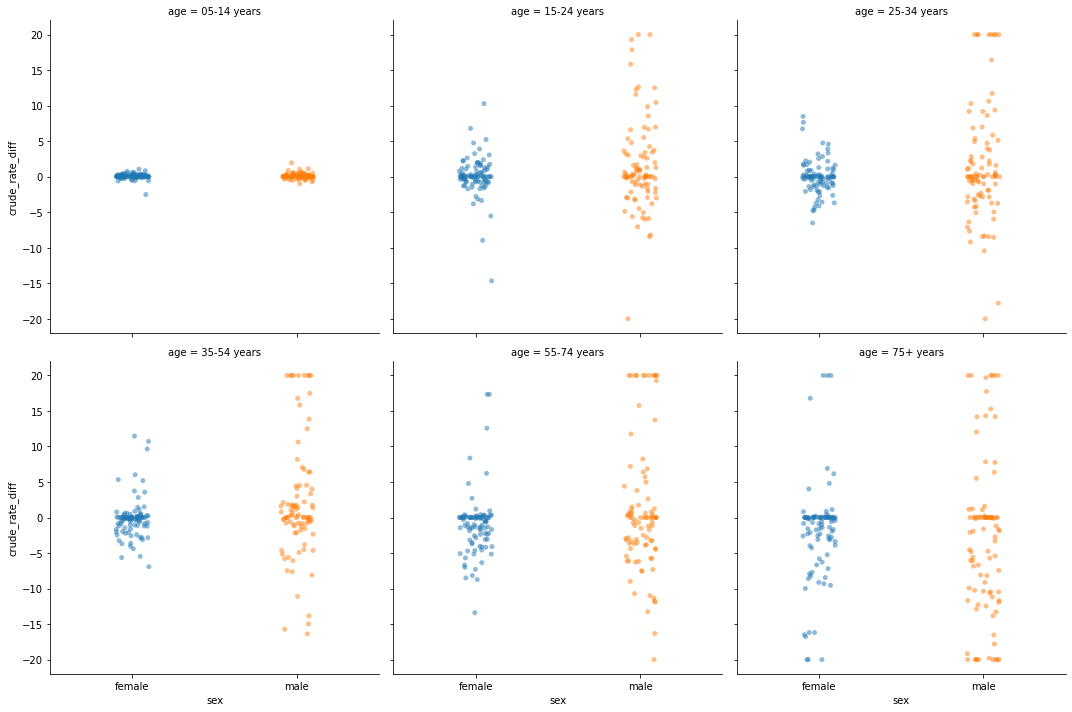

In [33]:
sns.catplot(x='sex', y="crude_rate_diff", col="age", col_wrap=3, data=final_df, alpha=0.5)
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World_suicides_deacde_1986-1995_and_1996-2005.png",format='png')

In [30]:
# difference in median of crude rates between two decades
# perhaps there is a better way to calculate this, instead of doing two calculations and joining them into one table
decade1 = decade_wise[(decade_wise['decade'] == '1996-2005') & (decade_wise['count'] >= 5)]
decade2 = decade_wise[(decade_wise['decade'] == '2006-2015') & (decade_wise['count'] >= 5)]

final_df = decade1.merge(decade2, left_on=['country','sex','age'], 
            right_on=['country','sex','age'], how='inner',
           suffixes=['_decade1','_decade2'])
           
final_df['crude_rate_diff'] = final_df['median_decade2'] - final_df['median_decade1']

# capping on crude rates difference
final_df.loc[final_df['crude_rate_diff'] > 20, 'crude_rate_diff'] = 20
final_df.loc[final_df['crude_rate_diff'] < -20, 'crude_rate_diff'] = -20

print('There are', final_df['country'].nunique(), 'countries with at least',5, 'years of data.')
final_df.head()

There are 108 countries with at least 5 years of data.


,country,decade_decade1,sex,age,median_decade1,count_decade1,decade_decade2,median_decade2,count_decade2,crude_rate_diff
0,Albania,1996-2005,female,05-14 years,0.278641,10,2006-2015,0.0,10,-0.278641
1,Albania,1996-2005,female,15-24 years,5.317182,10,2006-2015,0.0,10,-5.317182
2,Albania,1996-2005,female,25-34 years,3.682569,10,2006-2015,0.0,10,-3.682569
3,Albania,1996-2005,female,35-54 years,2.452446,10,2006-2015,0.0,10,-2.452446
4,Albania,1996-2005,female,55-74 years,1.779099,10,2006-2015,0.0,10,-1.779099


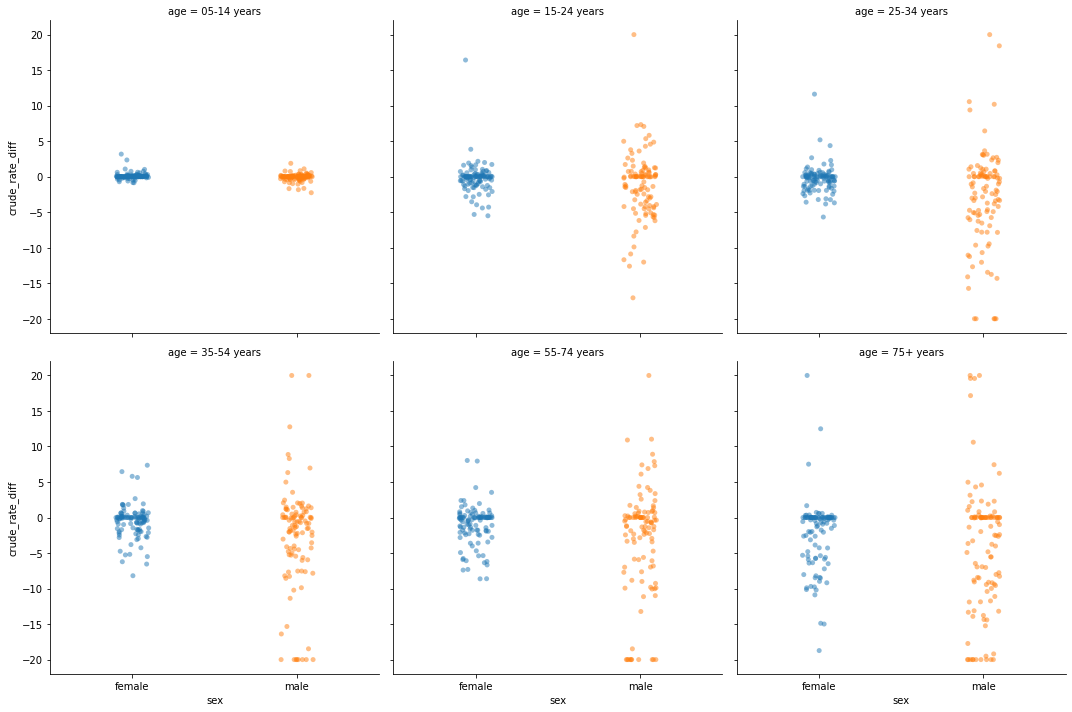

In [31]:
sns.catplot(x='sex', y="crude_rate_diff", col="age", col_wrap=3, sharey=True, data=final_df, alpha=0.5)
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\World_suicides_deacde_1996-2005_and_2005-2015.png",format='png')